In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.append('../')
import utils_auto 

# Configuration

In [3]:
trial_idx=2
paper='1508.00296'

# Code-generation prompts

In [4]:
prompt=(utils_auto.generate_prompt(template='prompt.md',docstring='docstring.md',paper=paper,save=True,trial_idx=trial_idx))

In [5]:
print(prompt)

You are a condensed matter physicist working on the numerical calculation for the Hamiltonian of a system using the Hartree Fock method. I will provide you with the physical Hamitonian written in second quantized form as an equation in LaTeX. You should convert it into a class for the HartreeFockHamiltonian using Python and necessary packages, such as numpy and scipy.
This is a multiple-step problem, and you will execute this process by analyzing the equation and answering smaller questions sequentially in order to finally generate the class. The class has the following structure:

CLASS DOCSTRING: 
```
class HartreeFockHamiltonian:
  def __init__(self, N_shell, parameters:dict[str, Any], filling_factor: float=0.5):
    self.lattice = 'square' | 'triangular'
    self.D = # LLM Task: has to define this tuple.
    self.basis_order = {'0': 'flavor_type_0', '1': 'flavor_type_1', ... 'D-1': 'flavor_type_D-1'}
    # this is the basis order that the Hamiltonian will follow

    # Occupancy re

# LLM-Generated code

In [6]:
generated_code = utils_auto.code_generate(prompt,max_tokens=25600,budget_tokens=12800,)


#################### THINKING ####################

Let's break down this Hamiltonian step by step and answer each question.

The Hamiltonian consists of two parts:
1. Non-interacting part: 
   - Hopping terms (t_N, t_B, t_BN)
   - On-site energy term (Delta)
2. Interacting part (Hartree):
   - On-site Coulomb repulsion (U_B, U_N)
   - Additional interaction terms (V_B, V_BN)

Let's tackle question 1 first:

## Question 1: Dimension and Basis Order

Looking at the operators in the Hamiltonian:
- a^†_{k σ}, a_{k σ}: Creation and annihilation operators for A type atoms with spin σ
- b^†_{k σ}, b_{k σ}: Creation and annihilation operators for B type atoms with spin σ

So we have two types of atoms (A and B) and two spin states (up and down), which gives us a total of 4 possible combinations.

The dimension tuple D should reflect these flavors. Let's define it as (2, 2) where:
- First index (0, 1): Represents atom type (A, B)
- Second index (0, 1): Represents spin (up, down)

So our basis

In [7]:
print(generated_code['thinking'])

Let's break down this Hamiltonian step by step and answer each question.

The Hamiltonian consists of two parts:
1. Non-interacting part: 
   - Hopping terms (t_N, t_B, t_BN)
   - On-site energy term (Delta)
2. Interacting part (Hartree):
   - On-site Coulomb repulsion (U_B, U_N)
   - Additional interaction terms (V_B, V_BN)

Let's tackle question 1 first:

## Question 1: Dimension and Basis Order

Looking at the operators in the Hamiltonian:
- a^†_{k σ}, a_{k σ}: Creation and annihilation operators for A type atoms with spin σ
- b^†_{k σ}, b_{k σ}: Creation and annihilation operators for B type atoms with spin σ

So we have two types of atoms (A and B) and two spin states (up and down), which gives us a total of 4 possible combinations.

The dimension tuple D should reflect these flavors. Let's define it as (2, 2) where:
- First index (0, 1): Represents atom type (A, B)
- Second index (0, 1): Represents spin (up, down)

So our basis will be:
0, 0: A atom, spin up
0, 1: A atom, spin do

In [8]:
print(generated_code['text'])

# ANSWER:

1) Tuple of Flavors (D) = (2, 2)
Basis Order:
0: atom_type. Order: Nitrogen (N), Boron (B)
1: spin. Order: up, down

2) EXP-VAL DEPENDENT TERMS:
- `\langle b^{\dagger}_{k, \sigma} b_{k, \sigma} \rangle`: Mean of exp_val for Boron atoms with spin σ
- `\langle a^{\dagger}_{k, \sigma} a_{k, \sigma} \rangle`: Mean of exp_val for Nitrogen atoms with spin σ

TERMS:
- t_N * a^†_{k σ} a_{k σ} * sum_n e^{-ik·n} -> H[0, σ, 0, σ, k], NI (Nitrogen hopping)
- t_B * b^†_{k σ} b_{k σ} * sum_n e^{-ik·n} -> H[1, σ, 1, σ, k], NI (Boron hopping)
- t_BN * a^†_{k σ} b_{k σ} * sum_{n'} exp{-ik·n'} -> H[0, σ, 1, σ, k], NI (N-B hopping)
- t_BN * b^†_{k σ} a_{k σ} * sum_{n'} exp{ik·n'} -> H[1, σ, 0, σ, k], NI (B-N hopping)
- Delta * a^†_{k σ} a_{k σ} -> H[0, σ, 0, σ, k], NI (Nitrogen on-site energy)
- U_B/N * <b^†_{k, σ} b_{k, σ}> * b^†_{k, σ'} b_{k, σ'} -> H[1, σ', 1, σ', k], I (Boron Coulomb repulsion)
- U_N/N * <a^†_{k, σ} a_{k, σ}> * a^†_{k, σ'} a_{k, σ'} -> H[0, σ', 0, σ', k], I (Nitrogen Coulo

In [9]:
code = utils_auto.extract_code(generated_code['text'])

In [10]:
print(code)

import numpy as np
from typing import Any
from HF import *

class HartreeFockHamiltonian:
    """Hartree-Fock Hamiltonian for a square-centered lattice with N (Nitrogen) atoms at vertices
    and B (Boron) atoms at centers, considering different spin states.
    
    Args:
        N_shell (int): Number of shells in the first Brillouin zone.
        parameters (dict): Dictionary containing model parameters.
        filling_factor (float): Filling factor, default is 0.5.
    """
    def __init__(self, N_shell: int, parameters: dict[str, Any]={}, filling_factor: float=0.5):
        self.lattice = 'square'  # Square-centered lattice
        self.D = (2, 2)  # (atom_type, spin)
        self.basis_order = {'0': 'atom_type', '1': 'spin'}
        # 0: atom_type: Nitrogen (N), Boron (B)
        # 1: spin: up, down
        
        # Occupancy relevant parameters
        self.nu = filling_factor
        self.T = parameters.get('T', 0)  # temperature, default to 0
        self.a = parameters.get(

In [11]:
utils_auto.save_code(code,paper,trial_idx)

Code saved to code_1508_00296_2.py


# Code evaluation

In [12]:
code_path = 'code_{int}_{decimal}_{trial_idx}'.format(int=paper.split('.')[0],decimal=paper.split('.')[1],trial_idx=trial_idx) 

In [13]:
import importlib

In [14]:
module = importlib.import_module(code_path)

In [15]:
import HF

## Task 1: Check k-space

In [16]:
ham = module.HartreeFockHamiltonian(N_shell=10,)

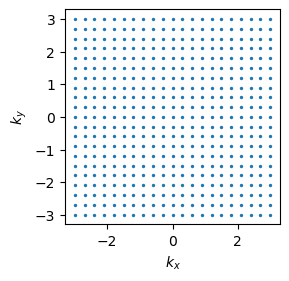

In [17]:
fig1=utils_auto.plot_kspace(kspace=ham.k_space)

## Task 2: Check energy dispersion for non-interacting term

In [18]:
ham = module.HartreeFockHamiltonian(N_shell=10,parameters={'Delta':0},filling_factor=1/2)


In [19]:
h_nonint = ham.generate_non_interacting()

In [20]:
wf,en= HF.diagonalize(h_nonint) # or HF.diagonalize

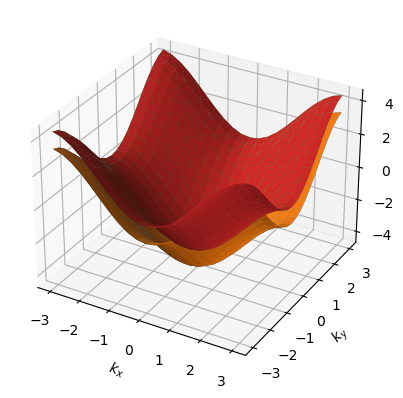

In [21]:
utils_auto.plot_2d_bandstructure(ham,en)

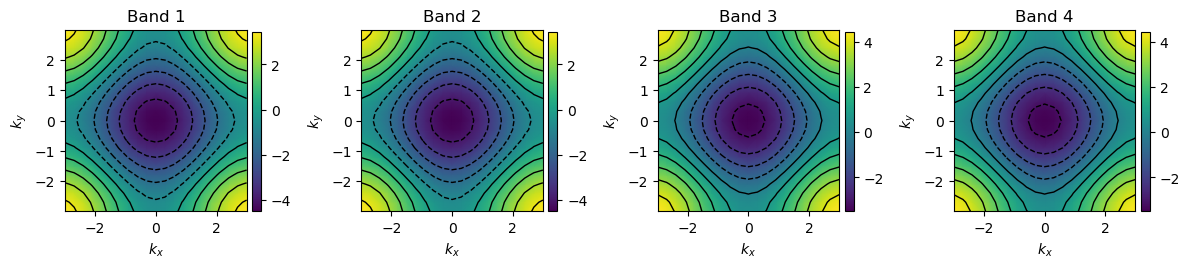

In [22]:
fig2=utils_auto.plot_2d_false_color_map(ham,en)

## Task 3: Infinitesemial U limit

In [23]:
ham_int= module.HartreeFockHamiltonian(N_shell=10,  
parameters={'V_BN':1e-5,'U_N':0,'U_B':0,'V_B':0},filling_factor=1/2)

In [24]:
wf,en= HF.diagonalize(ham_int.generate_non_interacting())
exp_val= HF.get_exp_val(wf,en,1/2,0)
exp_val=HF.unflatten(exp_val,ham_int.D,ham.N_k)

In [25]:
wf_int, en_int, exp_val_int= HF.solve(ham_int,exp_val,100)

Convergence reached at iteration 0


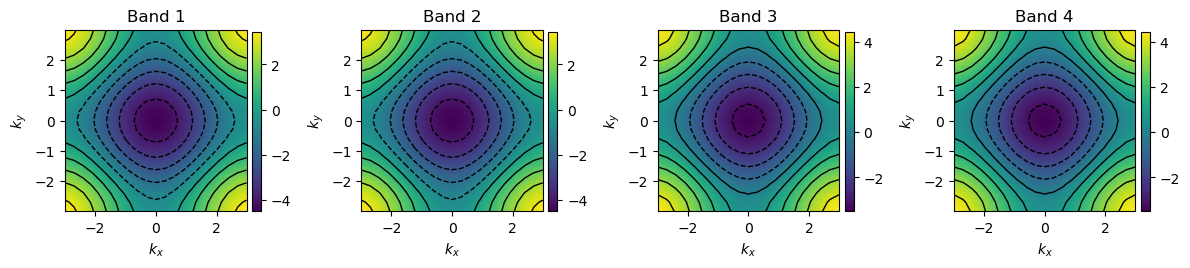

In [26]:
fig3=utils_auto.plot_2d_false_color_map(ham_int,en_int)

## Task 4: Large U limit

In [27]:
ham_int= module.HartreeFockHamiltonian(N_shell=10,  parameters={'V_BN':1e5,'U_N':0,'U_B':0,'V_B':0},filling_factor=1/2)


In [28]:
h_nonint=ham_int.generate_non_interacting()
h_nonint[0,0,:]-=100
h_nonint[1,1,:]-=100
wf,en=HF.diagonalize(h_nonint)
exp_val=HF.get_exp_val(wf,en,1/2,0)
exp_val=HF.unflatten(exp_val,ham_int.D,ham.N_k)

In [29]:
wf_int, en_int, exp_val_int=HF.solve(ham_int,exp_val,99)

Convergence reached at iteration 10


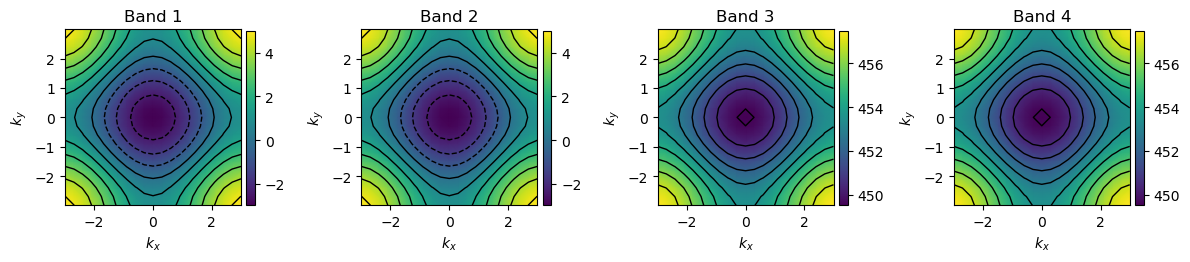

In [30]:
fig4=utils_auto.plot_2d_false_color_map(ham_int,en_int)

In [31]:
utils_auto.print_gap(ham_int,exp_val,en_int,2)

Gap is 444.53
U/T is 107.11
mean_U is 56.88


# Auto eval

## Task 1

In [32]:
result1 = utils_auto.vision_eval(
    fig=fig1, 
    prompt_text=utils_auto.generate_evalution_prompt(rubric='rubrics1.md', image='image1.md', paper=paper)
    )


#################### THINKING ####################

Let me analyze this problem step-by-step according to the rubric. The rubric asks me to check:
1. Whether the image shows a momentum space mesh in the first Brillouin zone of the concerned problem
2. The point group symmetry

First, let me understand the physical system:
- We have a square-centered lattice with N atoms at the vertices and B atoms at the centers
- The Hamiltonian includes:
  - Hopping terms between N atoms (t_N)
  - Hopping terms between B atoms (t_B)
  - Hopping terms between N and B atoms (t_BN)
  - On-site energy difference for N atoms (Δ)
  - Various interaction terms (U_N, U_B, V_B, V_BN)

Now, let's examine the image:
- The image shows a 2D grid of points in k-space
- The axes are labeled k_x and k_y
- The range of both axes goes from approximately -3 to 3
- The points appear to form a regular grid in a square region

For a square lattice, the first Brillouin zone is typically a square in k-space. The convention

In [33]:
answer1=utils_auto.extract_result_content(result1['text'])

## Task 2

In [34]:
result2 = utils_auto.vision_eval(
    fig=fig2, 
    prompt_text=utils_auto.generate_evalution_prompt(rubric='rubrics2.md', image='image2.md', paper=paper)
    )


#################### THINKING ####################

Let me analyze the image and evaluate whether it meets the criteria specified in the rubric.

1. First, I need to identify the shape of the Brillouin zone boundary in the plots.

Looking at the four band structure plots (labeled Band 1, Band 2, Band 3, and Band 4), I can see that the plots are displaying a square region for the Brillouin zone. The x and y axes are labeled as k_x and k_y respectively, and they extend from approximately -2.5 to 2.5 in both directions. This square-shaped Brillouin zone is indeed what we would expect for a square-centered lattice (with N atoms at vertices and B atoms at the centers of the squares).

2. Next, I need to examine the symmetry of the energy distribution:

2.1 Highest energy regions (yellow):
In all four band plots, the highest energy regions (yellow color) appear at the corners of the square Brillouin zone. These correspond to the (±2.5, ±2.5) points approximately.

2.2 Pattern of energy vari

In [35]:
answer2=utils_auto.extract_result_content(result2['text'])

## Task 3

In [36]:
result3 = utils_auto.vision_eval(
    fig=fig3, 
    prompt_text=utils_auto.generate_evalution_prompt(rubric='rubrics3.md', image='image3.md', paper=paper,Gap=0,nu=1/2)
    )


#################### THINKING ####################

Let me analyze the image provided and evaluate it against the rubric criteria.

### 1. Shape of the Brillouin zone boundary

The image shows 4 panels labeled "Band 1", "Band 2", "Band 3", and "Band 4". Each panel shows a false color plot of energy in the first Brillouin zone. The Brillouin zone is shown as a square from approximately -2.5 to 2.5 in both kx and ky directions. This is consistent with what would be expected for a square-centered lattice, where the Brillouin zone is typically square-shaped.

### 2. Symmetry of the energy distribution

#### 2.1 Highest energy regions (yellow)
In all four bands, the highest energy regions (shown in yellow) appear at the corners of the square Brillouin zone (approximately at coordinates (±2.5, ±2.5)). This pattern is consistent across all four bands.

#### 2.2 Pattern of energy variation
For all bands, there is a central minimum (purple/dark blue) at (0,0), and the energy increases radially

In [37]:
answer3=utils_auto.extract_result_content(result3['text'])

## Task 4

In [38]:
result4 = utils_auto.vision_eval(
    fig=fig4, 
    prompt_text=utils_auto.generate_evalution_prompt(rubric='rubrics4.md', image='image4.md', paper=paper,U_int='V_BN = 1e5',nu=1/2)
    )


#################### THINKING ####################

Let me analyze the image according to the rubric:

The image shows four false color plots labeled "Band 1", "Band 2", "Band 3", and "Band 4". These appear to be band structure plots in the first Brillouin zone after a self-consistent Hartree-Fock calculation.

1. Identifying the shape of the Brillouin zone:
   The plots show a square-shaped Brillouin zone with k_x and k_y axes ranging from approximately -2.5 to 2.5. This is consistent with a square-centered lattice (where N atoms are at vertices and B atoms at the center of each square).

2. Examining the symmetry of the energy distribution:
   2.1 Highest energy regions (yellow): In all four bands, the highest energy regions appear at the corners of the Brillouin zone.
   
   2.2 Pattern of energy variation: The energy forms concentric patterns, with the lowest energy (purple) at the center (k_x = 0, k_y = 0) and gradually increasing outward in a square-like pattern.
   
   2.3 Rota

In [39]:
answer4=utils_auto.extract_result_content(result4['text'])

In [40]:
utils_auto.save_final_answer(paper,trial_idx,answer1,answer2,answer3,answer4)

Final answer record for '2' saved to final_answer.yaml
